# Disease Prediction


In [106]:
import pandas as pd
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [107]:
train_df = pd.read_csv("archive (3)\Training.csv").dropna(axis=1)
test_df = pd.read_csv("archive (3)\Testing.csv")


In [108]:
# Check for missing and null values in train_df
missing_train = train_df.isnull().sum()
print("Missing values in train_df:")
print(missing_train[missing_train > 0])

# Check for missing and null values in test_df
missing_test = test_df.isnull().sum()
print("\nMissing values in test_df:")
print(missing_test[missing_test > 0])

Missing values in train_df:
Series([], dtype: int64)

Missing values in test_df:
Series([], dtype: int64)


In [109]:
train_df.isnull().sum()
test_df.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [111]:
X_train = train_df.drop(columns=["prognosis"])
y_train = train_df["prognosis"]

X_test = test_df.drop(columns=["prognosis"])
y_test = test_df["prognosis"]

In [112]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

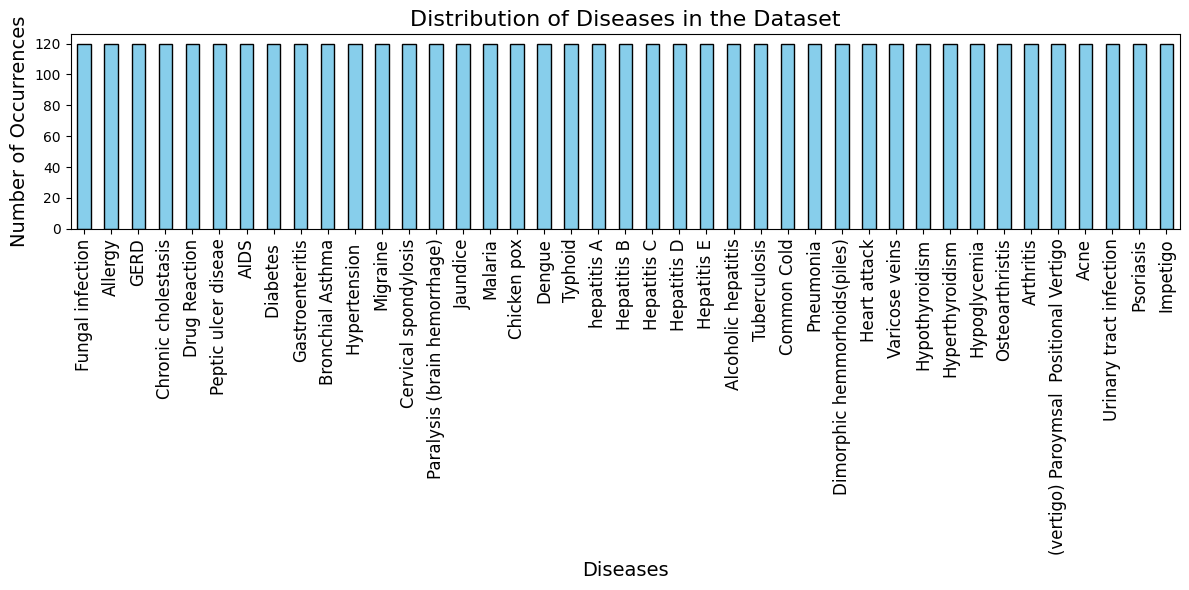

In [137]:
import matplotlib.pyplot as plt

# Count the occurrences of each disease in the training dataset
disease_counts = train_df['prognosis'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
disease_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Diseases in the Dataset', fontsize=16)
plt.xlabel('Diseases', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In [113]:
model = GaussianNB()
model.fit(X_train, y_train_encoded)

GaussianNB()

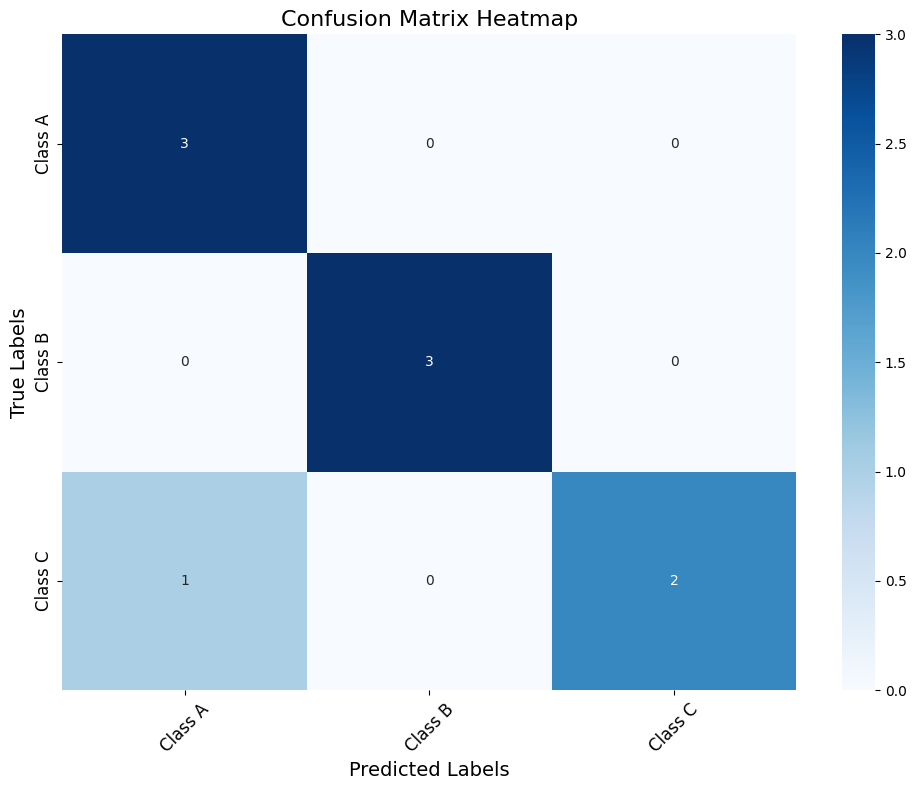

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def create_confusion_matrix_visualization(y_true, y_pred, labels):
    
    # Check if input arrays are empty or have mismatched shapes
    if not y_true.size or not y_pred.size:
        print("Error: Input arrays (y_true or y_pred) are empty.")
        return
    if y_true.shape != y_pred.shape:
        print(f"Error: Mismatched shapes between y_true ({y_true.shape}) and y_pred ({y_pred.shape}).")
        return

    # Check if labels are provided
    if labels is None:
        print("Warning: Class labels are not provided. Using numerical labels.")
        labels = np.unique(np.concatenate((y_true, y_pred)))  # Use unique values as labels, ensure all classes are present
        labels = [str(label) for label in labels] #convert to strings
    elif not all(isinstance(label, str) for label in labels):
        print("Error: Class labels must be strings.")
        return

    try:
        # confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=np.unique(np.concatenate((y_true, y_pred)))) # use all unique labels

       
        if cm.shape[0] != len(labels):
            print(f"Warning: The number of labels ({len(labels)}) does not match the confusion matrix dimension ({cm.shape[0]}x{cm.shape[1]}).  Adjusting labels to match.")
            labels = [str(i) for i in range(cm.shape[0])] # adjust labels

        #  heatmap for the confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted Labels', fontsize=14)
        plt.ylabel('True Labels', fontsize=14)
        plt.title('Confusion Matrix Heatmap', fontsize=16)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()  # 

        

    except Exception as e:
        print(f"An error occurred during visualization: {e}")
        return

if __name__ == "__main__":
   
    y_test_encoded = np.array([0, 1, 0, 2, 1, 2, 0, 1, 2])
    y_pred = np.array([0, 1, 0, 2, 1, 0, 0, 1, 2])
    
    class_names = ['Class A', 'Class B', 'Class C']  # Replace with your actual class names, make sure they are strings
    #class_names = None #  Test with None
    create_confusion_matrix_visualization(y_test_encoded, y_pred, class_names)
    

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.89%


In [ ]:
joblib.dump(model, "naive_bayes_model.pkl")
joblib.dump(le, "label_encoder.pkl")
joblib.dump(list(X_train.columns), "feature_names.pkl")
joblib.dump(X_train.columns.tolist(), "feature_order.pkl")

['feature_order.pkl']